<a href="https://colab.research.google.com/github/bhupendrak9917/My-AI-Projects/blob/main/Animal-10_Streamlit/animal_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import cv2

In [ ]:
dir = '/content/drive/MyDrive/AI Hack/Dataset'

In [ ]:
classes = ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']

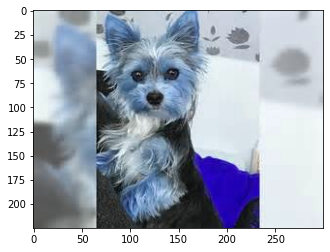

In [ ]:
for cl in classes:
    path = os.path.join(dir, cl)
    for im_path in os.listdir(path):
        img = cv2.imread(os.path.join(path, im_path))
        plt.imshow(img)
        break
    break

In [ ]:
img.shape

(225, 300, 3)

In [ ]:
dataset = []
for cl in classes:
    cls_num = classes.index(cl)
    path = os.path.join(dir, cl)
    for img in os.listdir(path):
        try:
            img = cv2.imread(os.path.join(path, img))
            resized_img = cv2.resize(img, (224,224))
            dataset.append([resized_img, cls_num])
        except Exception as e:
            pass

In [ ]:
len(dataset)

5000

In [ ]:
random.shuffle(dataset)
for i in dataset[:10]:
    print(classes[i[1]])

gallina
cavallo
pecora
pecora
cavallo
cane
ragno
cane
farfalla
gallina


In [ ]:
x =  []
y = []
for pic, label in dataset:
    x.append(pic)
    y.append(label)

In [ ]:
x = np.array(x)

In [ ]:
y = np.array(y)

In [ ]:
print(type(x),x.shape)
print(type(y),y.shape)

<class 'numpy.ndarray'> (5000, 224, 224, 3)
<class 'numpy.ndarray'> (5000,)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(4000, 224, 224, 3) (1000, 224, 224, 3) (4000,) (1000,)


In [ ]:
translate = ["dog", "horse", "elephant", "butterfly", "chicken", "cat", "cow", "sheep", "spider", "squirrel"]

In [ ]:
def img_show(pic, label, index):
    plt.figure(figsize=(15,2))
    plt.imshow(pic[index])
    plt.xlabel(translate[label[index]], fontsize=10)

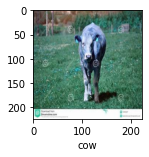

In [ ]:
img_show(x_test, y_test, 8)

In [ ]:
IMAGE_SHAPE = [224, 224]

In [ ]:
vgg = VGG16(input_shape= IMAGE_SHAPE + [3], weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
x = Flatten()(vgg.output)
predictions = Dense(10, activation='softmax')(x)

In [ ]:
model = Model(inputs = vgg.input, outputs = predictions)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
125/125 [==============================] - 1946s 16s/step - loss: 7.4786 - accuracy: 0.8150
Epoch 2/5
125/125 [==============================] - 1942s 16s/step - loss: 1.3602 - accuracy: 0.9595
Epoch 3/5
 38/125 [========>.....................] - ETA: 22:30 - loss: 0.5327 - accuracy: 0.9819

In [ ]:
model.evaluate(x_test, y_test)

In [ ]:
p = model.predict(x_test)

In [ ]:
print(np.argmax(p[0]))

In [ ]:
translate[np.argmax(p[0])]

In [ ]:
for i in range(5):
    img_show(x_test, y_test, i)

In [ ]:
model.save('animal-10.hdf5')

'butterfly'

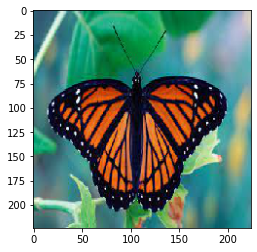

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
img1 = image.load_img('/content/drive/MyDrive/AI Hack/eval1.jpg', target_size= (224, 224))
plt.imshow(img1)
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
model = load_model('/content/drive/MyDrive/AI Hack/animal-10.hdf5')
result_b = model.predict(img1)
translate[np.argmax(result_b[0])]

'dog'

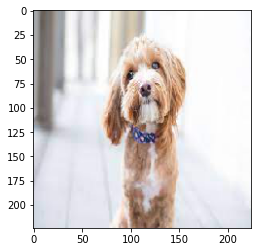

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
img2 = image.load_img('/content/drive/MyDrive/AI Hack/eval2.jpg', target_size= (224, 224))
plt.imshow(img2)
img2 = image.img_to_array(img2)
img2 = np.expand_dims(img2,axis=0)
model = load_model('/content/drive/MyDrive/AI Hack/animal-10.hdf5')
result_d = model.predict(img2)
translate[np.argmax(result_d[0])]

'elephant'

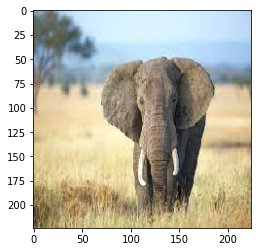

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
img3 = image.load_img('/content/drive/MyDrive/AI Hack/eval3.jpg', target_size= (224, 224))
plt.imshow(img3)
img3 = image.img_to_array(img3)
img3 = np.expand_dims(img3,axis=0)
model = load_model('/content/drive/MyDrive/AI Hack/animal-10.hdf5')
result_e = model.predict(img3)
translate[np.argmax(result_e[0])]

'sheep'

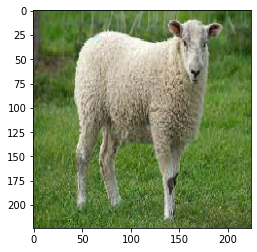

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
img4 = image.load_img('/content/drive/MyDrive/AI Hack/eval4.jpg', target_size= (224, 224))
plt.imshow(img4)
img4 = image.img_to_array(img4)
img4 = np.expand_dims(img4,axis=0)
model = load_model('/content/drive/MyDrive/AI Hack/animal-10.hdf5')
result_s = model.predict(img4)
translate[np.argmax(result_s[0])]

'squirrel'

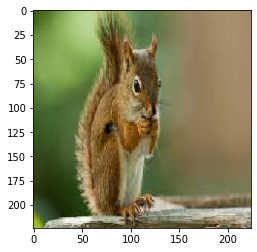

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
img5 = image.load_img('/content/drive/MyDrive/AI Hack/eval5.jpg', target_size= (224, 224))
plt.imshow(img5)
img5 = image.img_to_array(img5)
img5 = np.expand_dims(img5,axis=0)
model = load_model('/content/drive/MyDrive/AI Hack/animal-10.hdf5')
result_sq = model.predict(img5)
translate[np.argmax(result_sq[0])]

'spider'

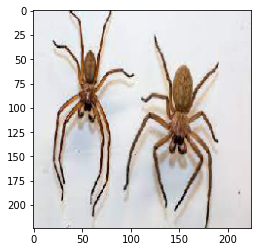

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
img6 = image.load_img('/content/drive/MyDrive/AI Hack/eval7.jpg', target_size= (224, 224))
plt.imshow(img6)
img6 = image.img_to_array(img6)
img6 = np.expand_dims(img6,axis=0)
model = load_model('/content/drive/MyDrive/AI Hack/animal-10.hdf5')
result_sp = model.predict(img6)
translate[np.argmax(result_sp[0])]

'horse'

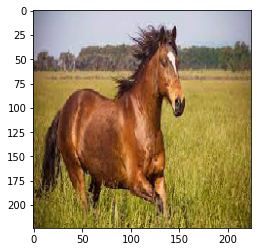

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
img6 = image.load_img('/content/drive/MyDrive/AI Hack/eval8.jpg', target_size= (224, 224))
plt.imshow(img6)
img6 = image.img_to_array(img6)
img6 = np.expand_dims(img6,axis=0)
model = load_model('/content/drive/MyDrive/AI Hack/animal-10.hdf5')
result_sp = model.predict(img6)
translate[np.argmax(result_sp[0])]

'chicken'

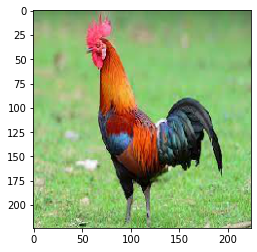

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
img6 = image.load_img('/content/drive/MyDrive/AI Hack/eval9.jpg', target_size= (224, 224))
plt.imshow(img6)
img6 = image.img_to_array(img6)
img6 = np.expand_dims(img6,axis=0)
model = load_model('/content/drive/MyDrive/AI Hack/animal-10.hdf5')
result_sp = model.predict(img6)
translate[np.argmax(result_sp[0])]

'cow'

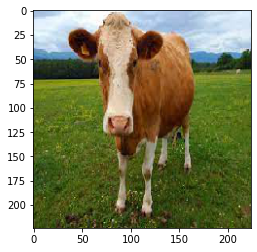

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
img6 = image.load_img('/content/drive/MyDrive/AI Hack/eval10.jpg', target_size= (224, 224))
plt.imshow(img6)
img6 = image.img_to_array(img6)
img6 = np.expand_dims(img6,axis=0)
model = load_model('/content/drive/MyDrive/AI Hack/animal-10.hdf5')
result_sp = model.predict(img6)
translate[np.argmax(result_sp[0])]

'cat'

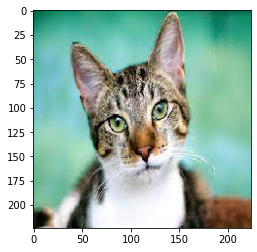

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
img6 = image.load_img('/content/drive/MyDrive/AI Hack/eval11.jpg', target_size= (224, 224))
plt.imshow(img6)
img6 = image.img_to_array(img6)
img6 = np.expand_dims(img6,axis=0)
model = load_model('/content/drive/MyDrive/AI Hack/animal-10.hdf5')
result_sp = model.predict(img6)
translate[np.argmax(result_sp[0])]